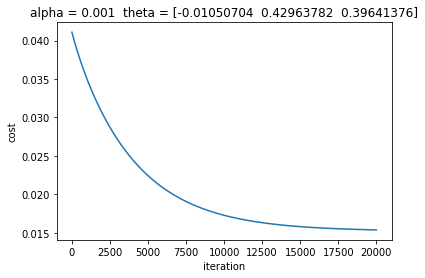

results: 0.166000129298324 (0.12357944020350366)


In [14]:
from pandas import read_table
import numpy as np
import matplotlib.pyplot as plt
# Starting codes for ha3 of CS596.

#NOTICE: Fill in the codes between "%PLACEHOLDER#start" and "PLACEHOLDER#end"

# There are two PLACEHODERS IN THIS SCRIPT

# parameters


def download_data(fileLocation, fields):

    frame = read_table(
        fileLocation,
        
        # Specify the file encoding
        # Latin-1 is common for data from US sources
        encoding='latin-1',
        #encoding='utf-8',  # UTF-8 is also common

        # Specify the separator in the data
        sep=',',            # comma separated values

        # Ignore spaces after the separator
        skipinitialspace=True,

        # Generate row labels from each row number
        index_col=None,

        # Generate column headers row from each column number
        header=0,          # use the first line as headers

        usecols=fields
    )

    # Return the entire frame
    return frame
    


# X          - single array/vector
# y          - single array/vector
# theta      - single array/vector
# alpha      - scalar
# iterations - scarlar

def gradientDescent(X, y, theta, alpha, numIterations):
    '''
    # This function returns a tuple (theta, Cost array)
    '''
    m = len(y)#len(y) =60
    #print(X)#[[1.         0.62871287 0.43253968]
    arrCost =[];
    transposedX = np.transpose(X) # transpose X into a vector  -> XColCount X m matrix
    for interation in range(0, numIterations):
        ################PLACEHOLDER3 #start##########################
        #: write your codes to update theta, i.e., the parameters to estimate. 
        #ground_truth - product_of_x
        #residualError = np.dot(X,theta) - y
        #residualError = np.subtract(np.dot(X,theta), y) #error
        residualError=np.dot(X,theta)-y
        #print(residualError)#[0.83236994 0.47976879 0.1849711  0.80346821 0.80346821 0.16763006
        #gradient =  (1/(2*numIterations))*np.square(np.sum(y-theta*x))#cost function error
        #gradient = np.dot(residualError,X)
        gradient = 1/m * np.dot(transposedX, residualError)
        change = [alpha * x for x in gradient]
        theta = np.subtract(theta, change)  # theta = theta - alpha * gradient
        ################PLACEHOLDER3 #end##########################

        ################PLACEHOLDER4 #start##########################
        # calculate the current cost with the new theta; 
        #print(y)#[1,...,60]
        #print(theta*X)#[[1,2,3],...,[60,60,60]]
        #apple=np.sum(theta*X)
        #print(apple)
        #residualError = y - np.dot(X,theta)
        #residualError = np.subtract(np.dot(X,theta), y) 
        residualError = np.dot(X,theta)-y
        #print(residualError)
        #atmp =  (1/(2*m))*np.square(residualError) 
        atmp = (1/(2*m))*np.sum(np.square(np.dot(X,theta)-y))
        #atmp = (1 / (2*m)) * np.sum(residualError**2)
        #print(atmp)
        arrCost.append(atmp)
        # cost = (1 / m) * np.sum(residualError ** 2)
        ################PLACEHOLDER4 #start##########################

    return theta, arrCost

def rescaleNormalization(dataArray):
    min = dataArray.min()
    denom = dataArray.max() - min
    newValues = []
    for x in dataArray:
        newX = (x - min) / denom
        newValues.append(newX)
    return newValues

def rescaleMatrix(dataMatrix):
    colCount = len(dataMatrix[0])
    rowCount = len(dataMatrix)
    newMatrix = np.zeros(dataMatrix.shape) 
    for i in range(0, colCount):
        min = dataMatrix[:,i].min()
        denom = dataMatrix[:,i].max() - min
        for k in range(0, rowCount):
            newX = (dataMatrix[k,i] - min) / denom
            newMatrix[k,i] = newX
    return newMatrix


def meanNormalization(dataArray):
    mean = np.mean(dataArray)
    denom = np.max(dataArray) - np.min(dataArray)
    newValues = []
    for x in dataArray:
        newX = (x - mean) / denom
        newValues.append(newX)
    return newValues

def meanMatrix(dataMatrix):
    colCount = len(dataMatrix[0])#3
    rowCount = len(dataMatrix)#105
    new_Value_0 = []
    new_Value_1 = []
    new_Value_2 = []
    new_Value = []
    newMatrix = np.zeros(dataMatrix.shape)
    for row in range(rowCount):
        new_Value_0.append(dataMatrix[row][0])
        new_Value_1.append(dataMatrix[row][1])
        new_Value_2.append(dataMatrix[row][2])
    new_Value_0 = meanNormalization(new_Value_0)
    new_Value_1 = meanNormalization(new_Value_1)
    new_Value_2 = meanNormalization(new_Value_2)
    for row in range(rowCount):
        col=0
        newMatrix[row][col] = new_Value_0[row]
        col+=1
        newMatrix[row][col] = new_Value_1[row]
        col+=1
        newMatrix[row][col] = new_Value_2[row]      
    return newMatrix


################PLACEHOLDER1 #start##########################
# test multiple learning rates and report their convergence curves. 
ALPHA = 0.001
MAX_ITER = 20000
################PLACEHOLDER1 #end##########################

#% step-1: load data and divide it into two subsets, used for training and testing
sat = download_data('sat.csv', [1, 2, 4]).values # three columns: MATH SAT, VERB SAT, UNI. GPA  # convert frame to matrix
#print(sat)#[643.   589.     3.52]
#(math_SAT. verb_SAT. univ_GPA)
################PLACEHOLDER2 #start##########################
# Normalize data
#sat = meanNormalization(sat) #doesn't work
#sat = rescaleMatrix(sat) # please replace this code with your own codes
#print(sat)#[0.62871287 0.43253968 0.83236994]

sat = meanMatrix(sat)
#print(sat)
################PLACEHOLDER2 #end##########################

 
# training data;
satTrain = sat[0:60, :]
# testing data; 
satTest = sat[60:len(sat),:]

#% step-2: train a linear regression model using the Gradient Descent (GD) method
# ** theta and xValues have 3 columns since have 2 features: y = (theta * x^0) + (theta * x^1) + (theta * x^2)
theta = np.zeros(3) 

xValues = np.ones((60, 3)) #print(xValues)#[1. 1. 1.]
xValues[:, 1:3] = satTrain[:, 0:2]#print(xValues)#[1.         0.62871287 0.43253968]
yValues = satTrain[:, 2]#print(yValues)#[0.83236994 0.47976879 0.1849711  0.80346821 0.80346821 0.16763006
# call the GD algorithm, placeholders in the function gradientDescent()
[theta, arrCost] = gradientDescent(xValues, yValues, theta, ALPHA, MAX_ITER)

#visualize the convergence curve
plt.plot(range(0,len(arrCost)),arrCost);
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('alpha = {}  theta = {}'.format(ALPHA, theta))
plt.show()

#% step-3: testing
testXValues = np.ones((len(satTest), 3)) 
testXValues[:, 1:3] = satTest[:, 0:2]
tVal =  testXValues.dot(theta)
 

#% step-4: evaluation
# calculate average error and standard deviation
tError = np.sqrt([x**2 for x in np.subtract(tVal, satTest[:, 2])])
print('results: {} ({})'.format(np.mean(tError), np.std(tError)))


